In [6]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', family='Malgun Gothic')

In [7]:
df= pd.read_csv('./9월 모의고사.csv', index_col=0, encoding='euc-kr')

In [8]:
df.head()

,성명,국어선택,국어표준점수,국어백분위,국어등급,수학선택,수학표준점수,수학백분위,수학등급,영어등급,한국사등급,탐구1선택,탐구1표준점수,탐구1백분위,탐구1등급,탐구2선택,탐구2표준점수,탐구2백분위,탐구2등급
학번,,,,,,,,,,,,,,,,,,,
3101,***,언어와 매체,95,34,6,확률과 통계,97,43,5,3,7,생활과윤리,38,17,7,사회·문화,52,53,5
3102,***,화법과 작문,95,34,6,확률과 통계,92,36,6,4,1,생활과윤리,42,25,6,사회·문화,38,17,7
3103,***,화법과 작문,96,36,6,확률과 통계,75,16,7,6,1,동아시아사,52,56,5,세계사,49,54,5
3104,***,화법과 작문,66,10,8,확률과 통계,90,34,6,5,3,생활과윤리,38,17,7,사회·문화,37,15,7
3105,***,언어와 매체,113,68,4,미적분,116,73,4,3,1,정치와법,65,96,1,사회·문화,62,88,2


## **1. 과목 선택 비율**

In [9]:
# 국어 선택과목 별로 카운트
k_choice = pd.DataFrame(df['국어선택'].value_counts(ascending=True))

In [10]:
k_choice

,count
국어선택,
언어와 매체,38
화법과 작문,86


In [11]:
# 차트 영역 지정하기
plt.figure(figsize=(6,5))

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

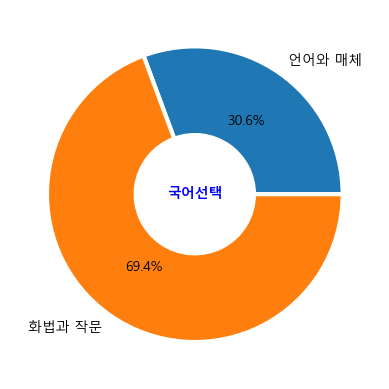

In [12]:
# 파이 그래프 그리기

wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white', 'width':0.6}

plt.pie(
    x = k_choice['count'],\
    labels = k_choice.index,\
    autopct = '%.1f%%',\
    wedgeprops = wedgeprops
)
plt.text(0,0,'국어선택', ha='center', va='center', fontsize=10, fontweight='bold', color="blue")


# 차트 표시하기
plt.show()

[국어선택] 또는 [수학선택]을 입력하세요.국어선택


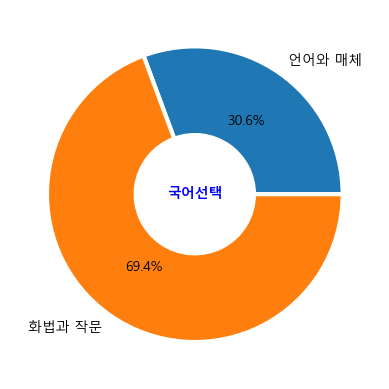

In [13]:
# input 함수 활용하기

subject = input('[국어선택] 또는 [수학선택]을 입력하세요.')


# 선택 시리즈 가지고 오기
choice = pd.DataFrame(df[subject].value_counts(ascending=True))


# 파이 그래프 그리기

wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white', 'width':0.6}

plt.pie(
    x = choice['count'],\
    labels = choice.index,\
    autopct = '%.1f%%',\
    wedgeprops = wedgeprops
)
plt.text(0,0,subject, ha='center', va='center', fontsize=10, fontweight='bold', color="blue")


# 차트 표시하기
plt.show()

In [14]:
df.isnull().sum()  # null 값 확인 -> null 이 있으면 0으로 대체

성명         0
국어선택       0
국어표준점수     0
국어백분위      0
국어등급       0
수학선택       0
수학표준점수     0
수학백분위      0
수학등급       0
영어등급       0
한국사등급      0
탐구1선택      0
탐구1표준점수    0
탐구1백분위     0
탐구1등급      0
탐구2선택      0
탐구2표준점수    0
탐구2백분위     0
탐구2등급      0
dtype: int64

In [15]:
df_class = df[['국어등급','수학등급','영어등급','한국사등급']]

array([[<AxesSubplot:title={'center':'국어등급'}>,
        <AxesSubplot:title={'center':'수학등급'}>],
       [<AxesSubplot:title={'center':'영어등급'}>,
        <AxesSubplot:title={'center':'한국사등급'}>]], dtype=object)

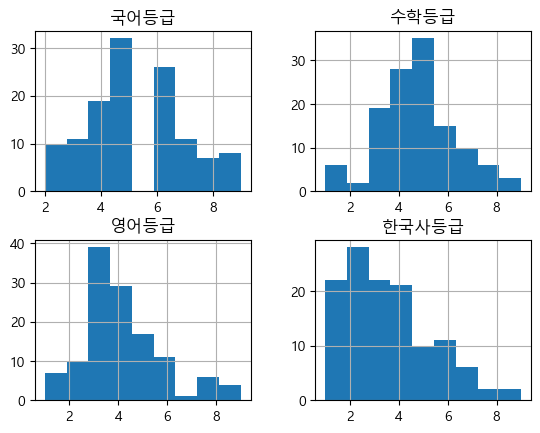

In [16]:
df_class.hist(bins=9)  # 등급은 9등급까지 있으므로 bins = 9

## **2. 과목별 등급 분포 그래프**

**국어 등급 분포**

In [17]:
# 간단한 막대 그래프
plt.figure(figsize = (6,3))

# 국어 등급 별로 카운트
k_class = pd.DataFrame(df['국어등급'].value_counts(ascending=True))

<Figure size 600x300 with 0 Axes>

In [18]:
# 오름차순으로 정렬하기

k_class_sort = pd.DataFrame(k_class.sort_index())
k_class_sort2 = k_class_sort.reset_index()
k_class_sort2

,국어등급,count
0,2,10
1,3,11
2,4,19
3,5,32
4,6,26
5,7,11
6,8,7
7,9,8


In [19]:
# 1등급이 없으므로 추가해주자. 1등급은 0명이다.

k_class_sort2.loc[8] = [1, 0]
k_class_sort2

k_class_sort2.sort_values(by = '국어등급', ascending = True, inplace = True)
k_class_sort2

,국어등급,count
8,1,0
0,2,10
1,3,11
2,4,19
3,5,32
4,6,26
5,7,11
6,8,7
7,9,8


In [20]:
k_class_sort3 = k_class_sort2.reset_index()
k_class_sort3

,index,국어등급,count
0,8,1,0
1,0,2,10
2,1,3,11
3,2,4,19
4,3,5,32
5,4,6,26
6,5,7,11
7,6,8,7
8,7,9,8


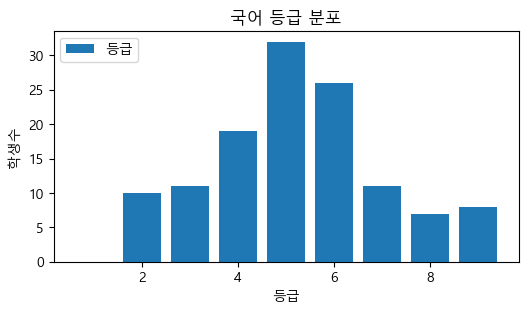

In [21]:
# 막대 그래프 그리기
plt.figure(figsize = (6,3))
plt.bar(k_class_sort3['국어등급'], k_class_sort3['count'], label = '등급')

# 제목, 축 라벨, 범례 추가
plt.title('국어 등급 분포')
plt.xlabel('등급')
plt.ylabel("학생수")
plt.legend(loc="upper left")
plt.show()


**수학 등급 분포**

In [22]:
# 간단한 막대 그래프
plt.figure(figsize = (6,3))

# 수학등급 별로 카운트
m_class = pd.DataFrame(df['수학등급'].value_counts(ascending=True))

<Figure size 600x300 with 0 Axes>

In [23]:
# 오름차순으로 정렬하기

m_class_sort = pd.DataFrame(m_class.sort_index())
m_class_sort2 = m_class_sort.reset_index()
m_class_sort2

,수학등급,count
0,1,6
1,2,2
2,3,19
3,4,28
4,5,35
5,6,15
6,7,10
7,8,6
8,9,3


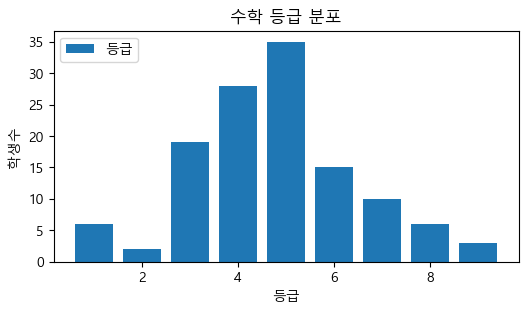

In [24]:
# 막대 그래프 그리기
plt.figure(figsize = (6,3))
plt.bar(m_class_sort2['수학등급'], m_class_sort2['count'], label = '등급')

# 제목, 축 라벨, 범례 추가
plt.title('수학 등급 분포')
plt.xlabel('등급')
plt.ylabel("학생수")
plt.legend(loc="upper left")
plt.show()


In [25]:
**영어 등급 분포**

SyntaxError: invalid syntax (4252048801.py, line 1)

In [26]:
# 간단한 막대 그래프
plt.figure(figsize = (6,3))

# 국어 등급 별로 카운트
e_class = pd.DataFrame(df['영어등급'].value_counts(ascending=True))

<Figure size 600x300 with 0 Axes>

In [27]:
# 오름차순으로 정렬하기

e_class_sort = pd.DataFrame(e_class.sort_index())
e_class_sort2 = e_class_sort.reset_index()
e_class_sort2

,영어등급,count
0,1,7
1,2,10
2,3,39
3,4,29
4,5,17
5,6,11
6,7,1
7,8,6
8,9,4


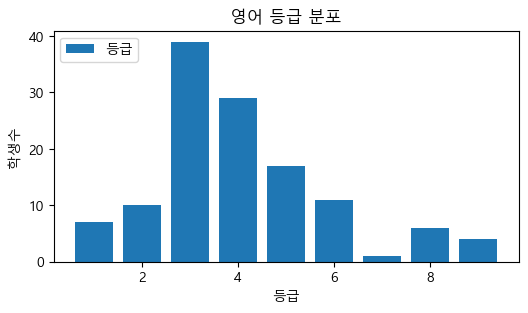

In [28]:
# 막대 그래프 그리기
plt.figure(figsize = (6,3))
plt.bar(e_class_sort2['영어등급'], e_class_sort2['count'], label = '등급')

# 제목, 축 라벨, 범례 추가
plt.title('영어 등급 분포')
plt.xlabel('등급')
plt.ylabel("학생수")
plt.legend(loc="upper left")
plt.show()

**국영수 종합하기**

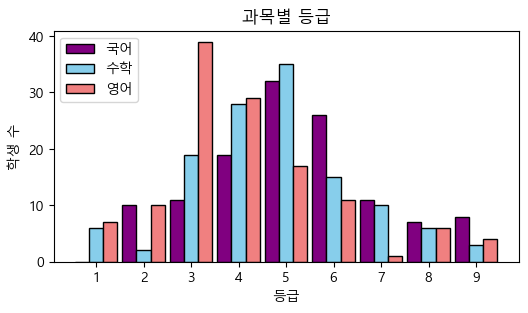

In [29]:
import numpy as np

# x 위치를 생성하여 막대 간격 조정
x = np.arange(len(e_class_sort2['영어등급']))
width = 0.3# 막대 너비

# 그래프 생성
plt.figure(figsize=(6, 3))

# sales는 x의 위치에서 width 만큼 -위치, expenses는 x의 위치에서 width 만큼 -위치
plt.bar(x - width, k_class_sort3['count'], width=width, color="purple", edgecolor="black", label="국어")
plt.bar(x, m_class_sort2['count'], width=width, color="skyblue", edgecolor="black", label="수학")
plt.bar(x + width, e_class_sort2['count'], width=width, color="lightcoral", edgecolor="black", label="영어")

# x축 레이블 설정
plt.xlabel("등급")
plt.ylabel("학생 수")
plt.title("과목별 등급")
# X축 눈금의 레이블 등급으로 지정
plt.xticks(x, e_class_sort2['영어등급']) 

# 범례 추가
plt.legend(loc="upper left")
plt.show()

## **3. 국어와 수학 성적 상관관계 분석**

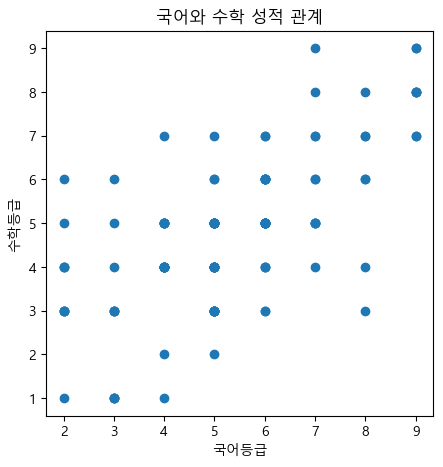

In [30]:
# 기본 Scatter Plot
plt.figure(figsize=(5, 5))
plt.scatter(df["국어등급"], df["수학등급"])

# 제목과 축 라벨 설정
plt.title("국어와 수학 성적 관계")
plt.xlabel("국어등급")
plt.ylabel("수학등급")
plt.show()


# 중복되는 데이터 어떻게 해결할까? ---> 문제...

## **4. 표준점수 합계, 정렬**

In [31]:
df_sc = df[['국어표준점수', '수학표준점수', '탐구1표준점수', '탐구2표준점수']]  # 표준점수만 불러오기

In [32]:
df_sc.head()
df_sc.sum(axis=0)
df['탐구2표준점수']  ## sum을 하려니까 데이터 타입 오류 뜸 

학번
3101    52
3102    38
3103    49
3104    37
3105    62
        ..
3617    37
3618    66
3619    63
3620    46
3621    42
Name: 탐구2표준점수, Length: 124, dtype: object

In [33]:
# '탐구1 표준점수', '탐구2 표준점수' 데이터를 object -> int로 바꾸어야 계산 가능

df_sc = df_sc.astype(int)

ValueError: invalid literal for int() with base 10: '-'

In [34]:
df_sc = df_sc.replace({'탐구1표준점수': '-'}, 0)   # '-' 때문에 'object'로 인식한 것이었음.
df_sc = df_sc.replace({'탐구2표준점수': '-'}, 0)
df_sc = df_sc.astype(int)

In [35]:
df_sc.dtypes  #바뀐 데이터 확인

국어표준점수     int32
수학표준점수     int32
탐구1표준점수    int32
탐구2표준점수    int32
dtype: object

In [36]:
df_sc.sum(axis=1)   # 표준점수 합계 잘 나오는지 확인

학번
3101    282
3102    267
3103    272
3104    231
3105    356
       ... 
3617    294
3618    378
3619    360
3620    310
3621    318
Length: 124, dtype: int64

In [37]:
df['표준점수 합계'] = df_sc.sum(axis=1)

In [38]:
df.head()

,성명,국어선택,국어표준점수,국어백분위,국어등급,수학선택,수학표준점수,수학백분위,수학등급,영어등급,한국사등급,탐구1선택,탐구1표준점수,탐구1백분위,탐구1등급,탐구2선택,탐구2표준점수,탐구2백분위,탐구2등급,표준점수 합계
학번,,,,,,,,,,,,,,,,,,,,
3101,***,언어와 매체,95,34,6,확률과 통계,97,43,5,3,7,생활과윤리,38,17,7,사회·문화,52,53,5,282
3102,***,화법과 작문,95,34,6,확률과 통계,92,36,6,4,1,생활과윤리,42,25,6,사회·문화,38,17,7,267
3103,***,화법과 작문,96,36,6,확률과 통계,75,16,7,6,1,동아시아사,52,56,5,세계사,49,54,5,272
3104,***,화법과 작문,66,10,8,확률과 통계,90,34,6,5,3,생활과윤리,38,17,7,사회·문화,37,15,7,231
3105,***,언어와 매체,113,68,4,미적분,116,73,4,3,1,정치와법,65,96,1,사회·문화,62,88,2,356


In [39]:
df.sort_values(by = '표준점수 합계', ascending = False, inplace = True)  # 표준점수대로 내림차순 정렬

In [40]:
df.head(10)   # 상위권 10명 보기

,성명,국어선택,국어표준점수,국어백분위,국어등급,수학선택,수학표준점수,수학백분위,수학등급,영어등급,한국사등급,탐구1선택,탐구1표준점수,탐구1백분위,탐구1등급,탐구2선택,탐구2표준점수,탐구2백분위,탐구2등급,표준점수 합계
학번,,,,,,,,,,,,,,,,,,,,
3520,***,언어와 매체,125,95,2,미적분,133,98,1,3,4,생활과윤리,64,94,1,사회·문화,65,95,1,387
3511,***,언어와 매체,119,81,3,미적분,133,98,1,2,3,생명과학I,64,94,2,지구과학I,64,92,2,380
3516,***,언어와 매체,120,84,3,미적분,130,95,1,3,4,한국지리,66,97,1,지구과학I,64,92,2,380
3618,***,언어와 매체,124,93,2,미적분,124,86,3,3,1,화학I,64,92,2,생명과학I,66,97,1,378
3603,***,언어와 매체,119,81,3,미적분,135,99,1,1,1,화학I,62,86,3,생명과학I,56,68,4,372
3605,***,언어와 매체,118,79,3,미적분,133,98,1,3,1,화학I,64,92,2,생명과학I,53,56,5,368
3108,***,화법과 작문,113,68,4,미적분,127,91,2,1,1,경제,64,88,3,사회·문화,60,81,3,364
3203,***,화법과 작문,124,93,2,미적분,114,70,4,1,1,생활과윤리,64,94,1,세계사,61,80,3,363
3317,***,언어와 매체,124,93,2,미적분,124,86,3,1,4,생활과윤리,54,61,4,사회·문화,60,81,3,362


In [41]:
df.info()  # 124개의 행 데이터 확인

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, 3520 to 3215
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   성명       124 non-null    object
 1   국어선택     124 non-null    object
 2   국어표준점수   124 non-null    int64 
 3   국어백분위    124 non-null    int64 
 4   국어등급     124 non-null    int64 
 5   수학선택     124 non-null    object
 6   수학표준점수   124 non-null    int64 
 7   수학백분위    124 non-null    int64 
 8   수학등급     124 non-null    int64 
 9   영어등급     124 non-null    int64 
 10  한국사등급    124 non-null    int64 
 11  탐구1선택    124 non-null    object
 12  탐구1표준점수  124 non-null    object
 13  탐구1백분위   124 non-null    object
 14  탐구1등급    124 non-null    object
 15  탐구2선택    124 non-null    object
 16  탐구2표준점수  124 non-null    object
 17  탐구2백분위   124 non-null    object
 18  탐구2등급    124 non-null    object
 19  표준점수 합계  124 non-null    int64 
dtypes: int64(9), object(11)
memory usage: 20.3+ KB


In [42]:
num = list(range(1,125))
num

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124]

In [43]:
df.insert(loc = 1, column ='등수_표점', value = num)   # 등수 열 추가

In [44]:
df.head()

,성명,등수_표점,국어선택,국어표준점수,국어백분위,국어등급,수학선택,수학표준점수,수학백분위,수학등급,...,한국사등급,탐구1선택,탐구1표준점수,탐구1백분위,탐구1등급,탐구2선택,탐구2표준점수,탐구2백분위,탐구2등급,표준점수 합계
학번,,,,,,,,,,,,,,,,,,,,,
3520,***,1,언어와 매체,125,95,2,미적분,133,98,1,...,4,생활과윤리,64,94,1,사회·문화,65,95,1,387
3511,***,2,언어와 매체,119,81,3,미적분,133,98,1,...,3,생명과학I,64,94,2,지구과학I,64,92,2,380
3516,***,3,언어와 매체,120,84,3,미적분,130,95,1,...,4,한국지리,66,97,1,지구과학I,64,92,2,380
3618,***,4,언어와 매체,124,93,2,미적분,124,86,3,...,1,화학I,64,92,2,생명과학I,66,97,1,378
3603,***,5,언어와 매체,119,81,3,미적분,135,99,1,...,1,화학I,62,86,3,생명과학I,56,68,4,372


## **5. 합격 가능성 여부 파악하기**

In [45]:
# 표준점수 합계가 350 이상이고, 영어등급이 2등급 이하인 학생이 합격 가능성이 있다.

df_filter = df[(df['표준점수 합계'] >= 350) & (df['영어등급'] <= 2) ]

In [46]:
df_filter

,성명,등수_표점,국어선택,국어표준점수,국어백분위,국어등급,수학선택,수학표준점수,수학백분위,수학등급,...,한국사등급,탐구1선택,탐구1표준점수,탐구1백분위,탐구1등급,탐구2선택,탐구2표준점수,탐구2백분위,탐구2등급,표준점수 합계
학번,,,,,,,,,,,,,,,,,,,,,
3511,***,2,언어와 매체,119,81,3,미적분,133,98,1,...,3,생명과학I,64,94,2,지구과학I,64,92,2,380
3603,***,5,언어와 매체,119,81,3,미적분,135,99,1,...,1,화학I,62,86,3,생명과학I,56,68,4,372
3108,***,7,화법과 작문,113,68,4,미적분,127,91,2,...,1,경제,64,88,3,사회·문화,60,81,3,364
3203,***,8,화법과 작문,124,93,2,미적분,114,70,4,...,1,생활과윤리,64,94,1,세계사,61,80,3,363
3317,***,9,언어와 매체,124,93,2,미적분,124,86,3,...,4,생활과윤리,54,61,4,사회·문화,60,81,3,362
3509,***,15,언어와 매체,123,90,2,미적분,116,73,4,...,2,화학I,54,60,4,지구과학I,62,87,2,355
3614,***,16,언어와 매체,123,90,2,미적분,119,78,3,...,4,물리학I,49,42,5,지구과학I,64,92,2,355
3515,***,17,화법과 작문,117,76,3,미적분,124,86,3,...,2,화학I,54,60,4,지구과학I,60,80,3,355


**학번 입력했을 때, 합격 가능 불가능 여부 파악하기**

In [47]:
df_last = df.reset_index()
df_last['학번']

0      3520
1      3511
2      3516
3      3618
4      3603
       ... 
119    3209
120    3314
121    3419
122    3119
123    3215
Name: 학번, Length: 124, dtype: int64

In [53]:
student_num = input('학번을 입력하세요. ex)3101')

df_last[df_last['학번'] == int(student_num)]  # 정수형으로 바꾸어주어야 함

학번을 입력하세요. ex)31013403


,학번,성명,등수_표점,국어선택,국어표준점수,국어백분위,국어등급,수학선택,수학표준점수,수학백분위,...,한국사등급,탐구1선택,탐구1표준점수,탐구1백분위,탐구1등급,탐구2선택,탐구2표준점수,탐구2백분위,탐구2등급,표준점수 합계
19,3403,***,20,화법과 작문,124,93,2,확률과 통계,104,54,...,5,생활과윤리,58,73,4,정치와법,63,88,2,349


In [ ]:
student_num = input('학번을 입력하세요. ex)3101')

student_info = df_last[df_last['학번'] == int(student_num)]  # 정수형으로 바꾸어주어야 함

student_info

In [50]:
print(student_info['표준점수 합계'])
print(student_info['영어등급'])

NameError: name 'student_info' is not defined

In [51]:
condition1 = student_info['표준점수 합계'] >= 350
condition2 = student_info['영어등급'] <= 2

print(condition1)
print(condition2)

NameError: name 'student_info' is not defined

In [52]:
if condition1 & condition2:
    print('합격입니다.')
else:
    print('불합격입니다.')

NameError: name 'condition1' is not defined